# Data Augmentation for Unsupervised Contrastive Loss Function Demo

Issue #520

Dante Basile

In [1]:
import matplotlib.pyplot as plt
import numpy as np

import os

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3"

import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.applications.resnet50 import preprocess_input

from unsupcon_loss import get_aug_seq

## Import and Display Data

(100, 32, 32, 3)


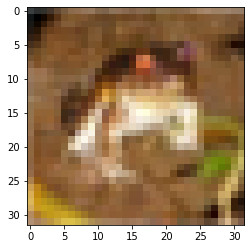

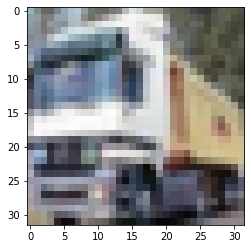

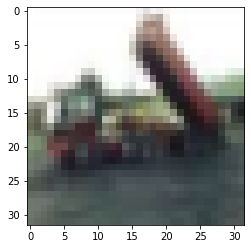

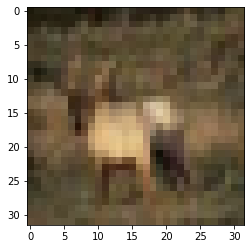

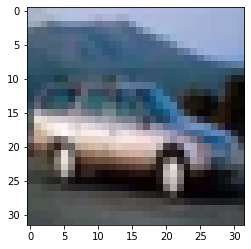

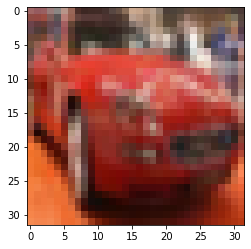

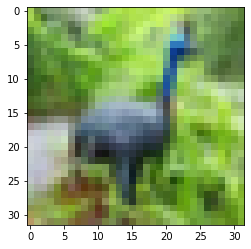

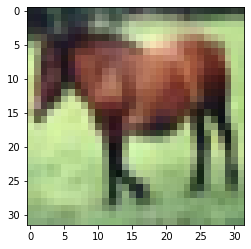

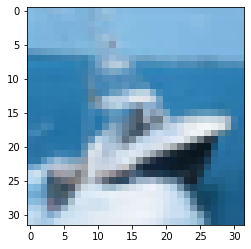

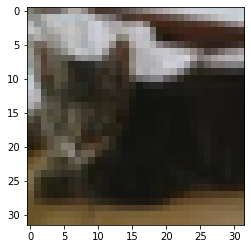

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X = X_train[:100]
print(np.shape(X))
X_batch = X[:10]
for i in range(np.size(X_batch, 0)):
    plt.figure()
    plt.imshow(X_batch[i])

In [3]:
print(X_batch[i, :2, :2])

[[[125 125 116]
  [110 101  91]]

 [[142 146 142]
  [146 144 139]]]


## Preprocess with resnet50.preprocess_input

In [4]:
X = preprocess_input(X)
X = tf.math.multiply(1.0 / 255, X)

### Display preprocessed data

(100, 32, 32, 3)


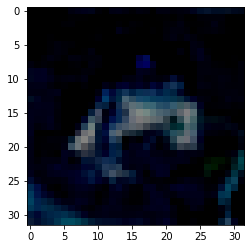

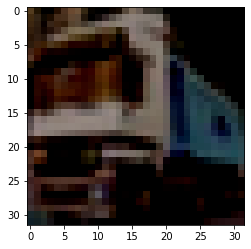

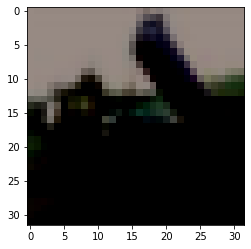

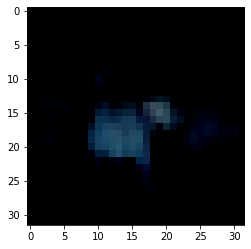

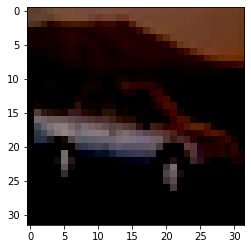

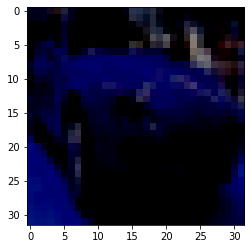

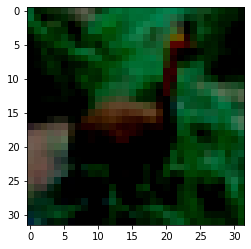

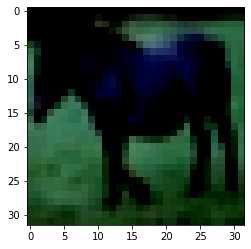

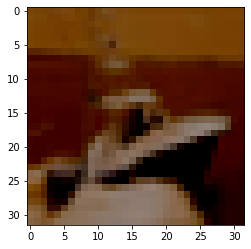

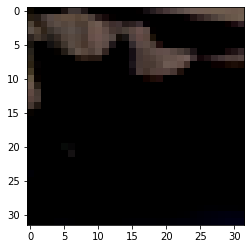

In [5]:
print(np.shape(X))
X_batch = X[:10]
for i in range(np.size(X_batch, 0)):
    plt.figure()
    plt.imshow(tf.clip_by_value(X_batch[i], 0.0, 1.0))  # clamp for imshow

In [6]:
print(X_batch[i, :2, :2])

tf.Tensor(
[[[ 0.04729803  0.03223922  0.00517647]
  [-0.05074119 -0.06187843 -0.05364706]]

 [[ 0.14925882  0.11459216  0.07184314]
  [ 0.13749412  0.10674903  0.08752941]]], shape=(2, 2, 3), dtype=float32)


In [7]:
X_batch.shape

TensorShape([10, 32, 32, 3])

### Apply Augmentation Pipeline

In [8]:
aug_seq = get_aug_seq(np.size(X_batch, 1), np.size(X_batch, 2))
X_batch_aug = tf.map_fn(aug_seq, X_batch)

Instructions for updating:
`seed2` arg is deprecated.Use sample_distorted_bounding_box_v2 instead.


### Display Augmented Data

(10, 224, 224, 3)


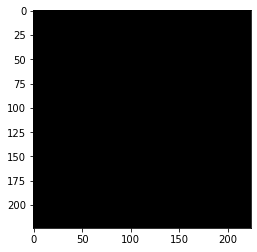

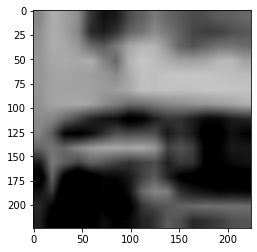

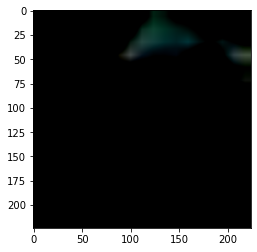

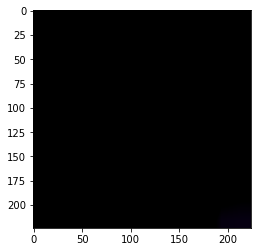

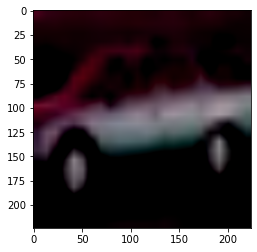

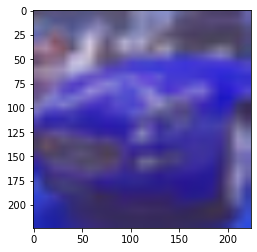

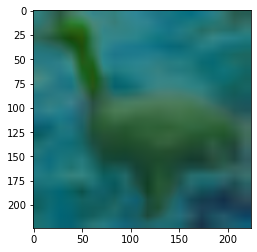

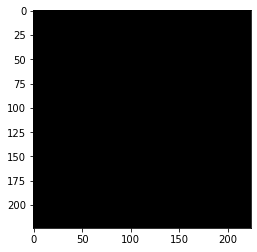

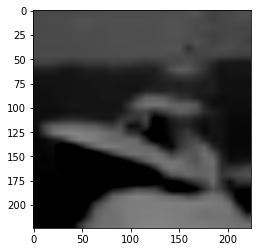

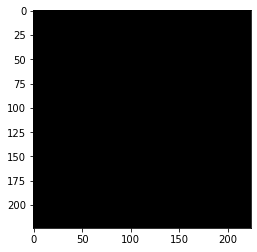

In [9]:
print(np.shape(X_batch_aug))
for i in range(np.size(X_batch_aug, 0)):
    plt.figure()
    plt.imshow(tf.clip_by_value(X_batch_aug[i], 0.0, 1.0))  # clamp for imshow

In [10]:
print(X_batch_aug[i, :2, :2])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]], shape=(2, 2, 3), dtype=float32)


## Preprocess without resnet50.preprocess_input

### Apply Augmentation Pipeline

In [11]:
X = X_train[:100]
X = tf.math.multiply(1.0 / 255, X)
X = tf.map_fn(aug_seq, X)

### Display Data

(100, 224, 224, 3)


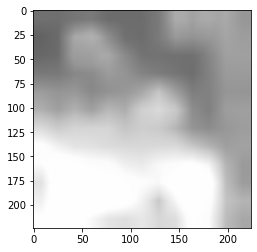

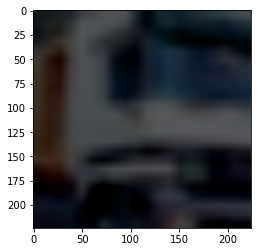

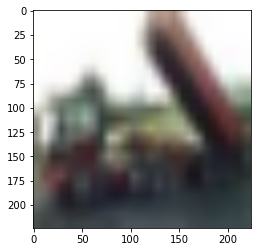

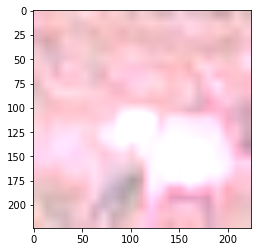

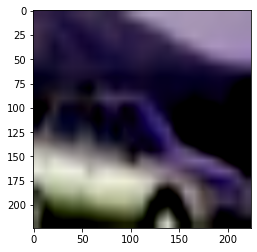

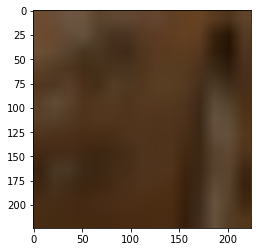

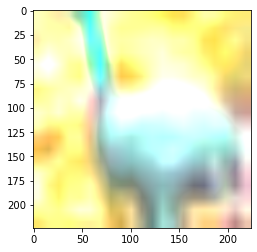

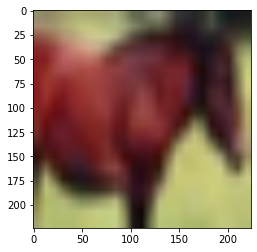

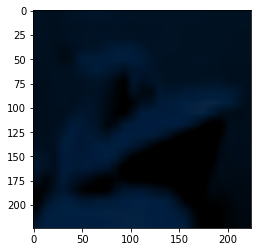

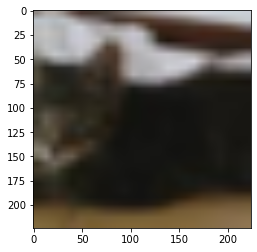

In [12]:
print(np.shape(X))
X_batch = X[:10]
for i in range(np.size(X_batch, 0)):
    plt.figure()
    plt.imshow(X_batch[i])

In [13]:
print(X_batch_aug[i, :2, :2])

tf.Tensor(
[[[0. 0. 0.]
  [0. 0. 0.]]

 [[0. 0. 0.]
  [0. 0. 0.]]], shape=(2, 2, 3), dtype=float32)
